In [127]:
import pandas as pd

import matplotlib.pyplot as plt
import datetime
import time
import numpy as np
%matplotlib inline

In [128]:
import os
init_path = os.getcwd()
path_to_results = init_path + '/results'
train_info = pd.read_csv(init_path + '/data/training_info.csv' , sep = ',',parse_dates=['date'])
test_info = pd.read_csv(init_path + '/data/test_info.csv' , sep = ',',parse_dates=['date'])
train_set = pd.read_csv(init_path + '/data/training_set.csv' , sep = ',')
test_set=pd.read_csv(init_path + '/data/test_set.csv' , sep = ',')

In [129]:
train_info.tail()

,mid,date,body,recipients
43608,404669,2001-10-18 12:46:32,FYI--The information below is an excellent ove...,center.dl-portland@enron.com
43609,404761,2001-10-15 11:18:02,FERC is holding a week-long conference on Re...,center.dl-portland@enron.com
43610,404870,2001-10-30 18:47:35,X-FileName: During the past few days several p...,center.dl-portland@enron.com john.lavorato@enr...
43611,404872,2001-11-01 10:51:29,X-FileName: Enron announces $1 billion of addi...,center.dl-portland@enron.com
43612,404873,2001-11-01 12:02:36,X-FileName: Enron s General Counsel sent out a...,dan.dietrich@enron.com center.dl-portland@enro...


In [130]:
len(train_info)

43613

In [131]:
train_info.dtypes

mid            int64
date          object
body          object
recipients    object
dtype: object

In [138]:
test_info.dtypes

mid              int64
date    datetime64[ns]
body            object
dtype: object

In [132]:
train_set.head()

,sender,mids
0,karen.buckley@enron.com,158713 158697 200301 158679 278595 298162 2002...
1,amr.ibrahim@enron.com,215241 3437 215640 3506 191790 3517 3520 3562 ...
2,andrea.ring@enron.com,270705 270706 270707 270708 270709 270710 2707...
3,sylvia.hu@enron.com,111444 111422 183084 111412 111347 110883 1105...
4,phillip.platter@enron.com,327074 327384 327385 264443 274124 274125 2741...


In [133]:
len(train_set)

125

In [134]:
test_info.head()

,mid,date,body
0,1577,2001-11-19 06:59:51,Note: Stocks of heating oil are very high for...
1,1750,2002-03-05 08:46:57,"Kevin Hyatt and I are going for ""sghetti"" at S..."
2,1916,2002-02-13 14:17:39,This was forwarded to me and it is funny. - Wi...
3,2094,2002-01-22 11:33:56,I will be in to and happy to assist too. I ma...
4,2205,2002-01-11 07:12:19,Thanks. I needed a morning chuckle.


In [139]:
train_info['year']=train_info['date'].str[:4]
train_info['year'].unique()


array(['2000', '2001', '0001', '1999', '1998', '0002'], dtype=object)

In [140]:
print(len(train_info.loc[train_info['year']=='0001']))
print(len(train_info.loc[train_info['year']=='0002']))

160
42


In [141]:
train_info=train_info.loc[train_info['year']!='0001']
train_info=train_info.loc[train_info['year']!='0002']

In [142]:
test_info['date']=pd.to_datetime(test_info['date'],format='%Y-%m-%d %H:%M:%S')
train_info['date']=pd.to_datetime(train_info['date'],format='%Y-%m-%d %H:%M:%S')
train_info.head()

,mid,date,body,recipients,year
0,60,2000-07-25 08:14:00,Legal has been assessing the risks of doing bl...,robert.badeer@enron.com murray.o neil@enron.co...,2000
1,66,2000-08-03 02:56:00,Attached is a spreadsheet to estimate export f...,kim.ward@enron.com robert.badeer@enron.com mur...,2000
2,74,2000-08-15 05:37:00,Kevin/Bob: Here is a quick rundown on the cons...,robert.badeer@enron.com john.massey@enron.com ...,2000
3,80,2000-08-20 14:12:00,check this out and let everyone know what s up...,robert.badeer@enron.com jeff.richter@enron.com,2000
4,83,2000-08-22 08:17:00,Further to your letter to us (addressed to Mr....,pgillman@schiffhardin.com kamarlantes@calpx.co...,2000


In [148]:
nb_mails_day = train_info[['date']].groupby([pd.Grouper(freq ='1d', key='date')]).count()
nb_mails_week = train_info[['date']].groupby([pd.Grouper(freq ='1w', key='date')]).count()

nb_mails_day_topredict = test_info[['date']].groupby([pd.Grouper(freq ='1d', key='date')]).count()
nb_mails_week_topredict = test_info[['date']].groupby([pd.Grouper(freq ='1w', key='date')]).count()

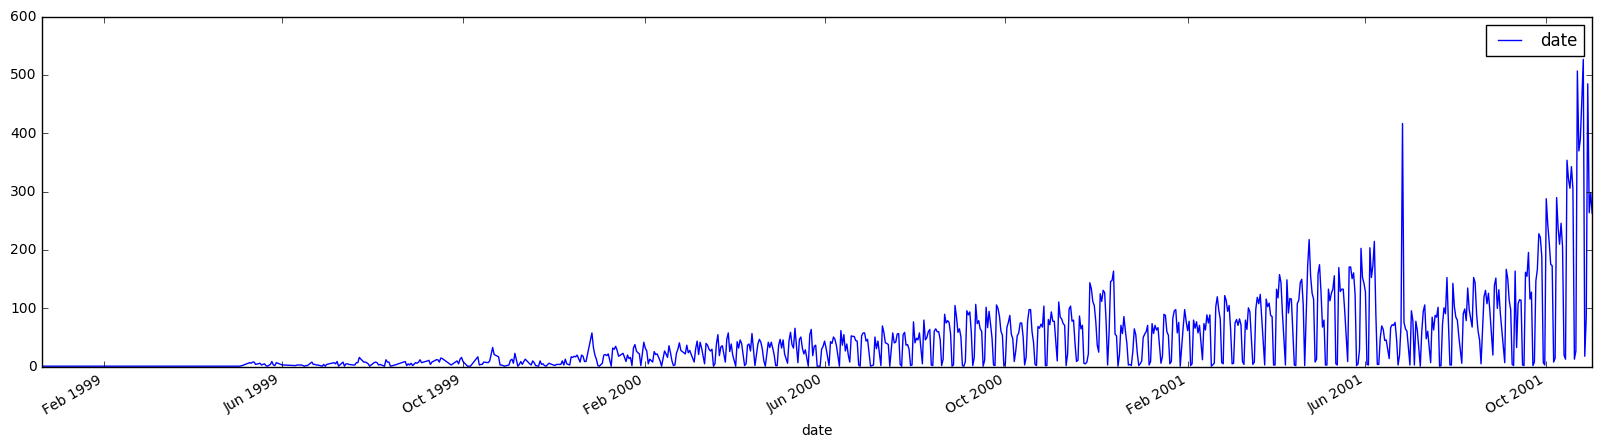

In [149]:
nb_mails_day.plot(figsize=(20,5))

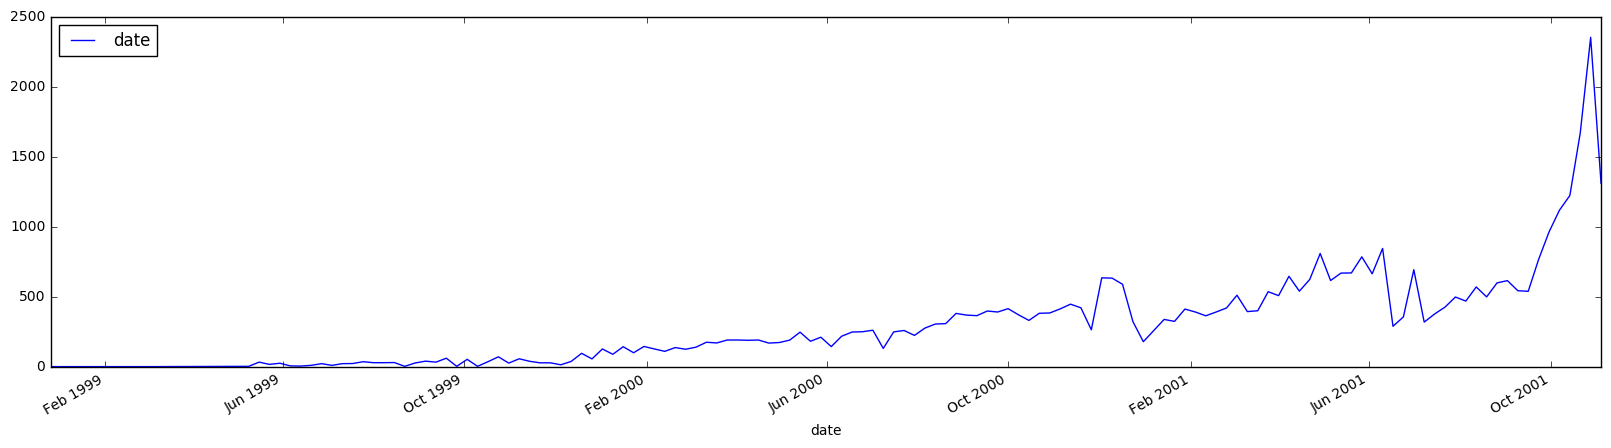

In [150]:
nb_mails_week.plot(figsize=(20,5))

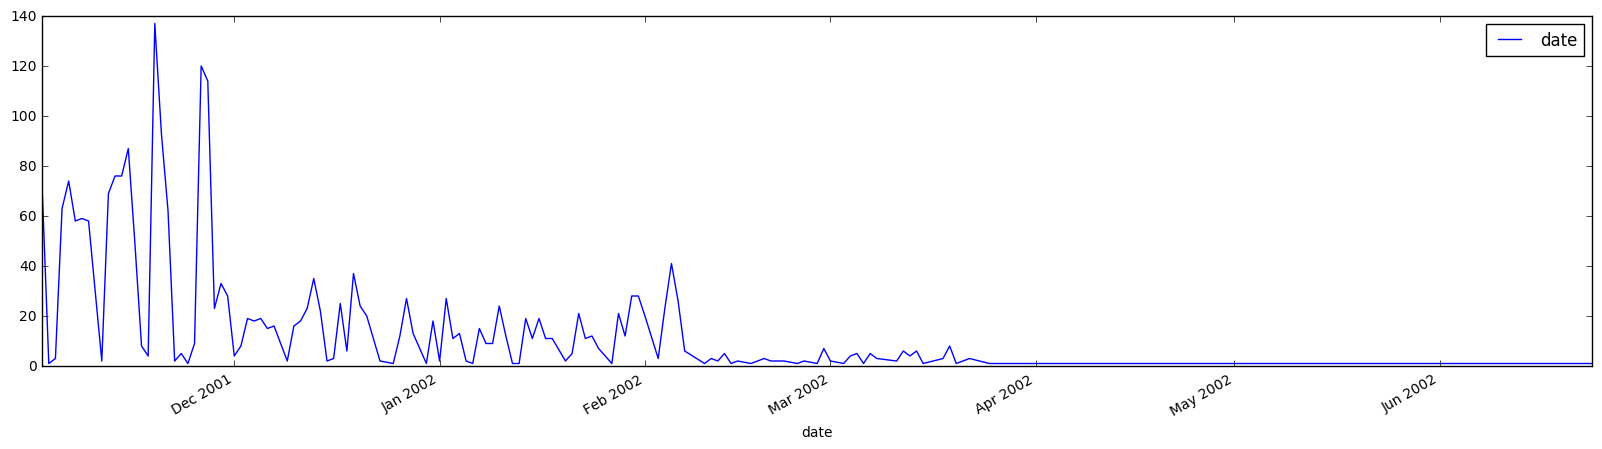

In [151]:
nb_mails_day_topredict.plot(figsize=(20,5))

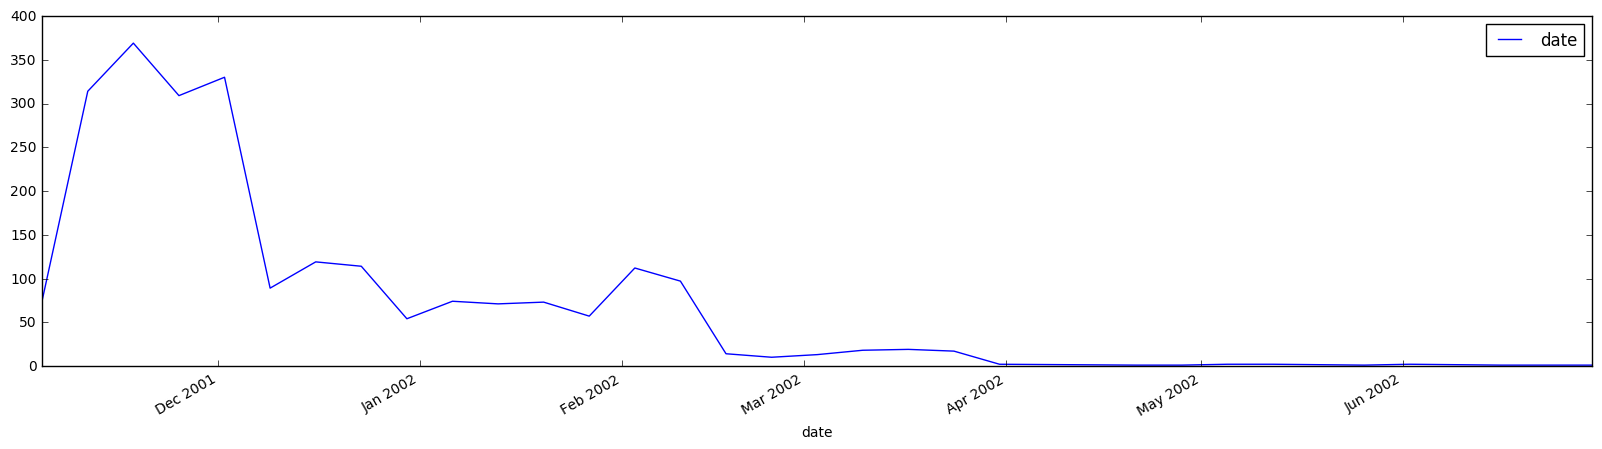

In [152]:
nb_mails_week_topredict.plot(figsize=(20,5))